In [1]:
import os
cwd = os.getcwd()
print(cwd)

C:\Users\feder\Documents\GitHub\relgan\src\jupyter_tests


In [2]:
os.chdir("..")
cwd = os.getcwd()
print(cwd)
assert cwd.endswith("src")

C:\Users\feder\Documents\GitHub\relgan\src


# Test on gumble softmax

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def add_gumbel(o_t, eps=1e-10):
    """
    Sample from Gumbel(0, 1)
    After some research and tests I discovered that it introdcues a noise with Final mean: 0.5862 and std: 1.29265
    This is a quite high std for that mean, and the added noise is high if compared to a softmax between 5k values
    that has mean of 0.0002!
    """
    u = np.random.uniform(size=o_t.shape)
    g_t = -np.log(-np.log(u + eps) + eps)
    gumbel_t = np.add(o_t, g_t)
    return gumbel_t

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    return np.exp(x) / np.sum(np.exp(x), axis=0)

def x_one_hot_appr(gumbel, temperature):
    return softmax(gumbel * temperature)

def do_gumble(o_t, temperature=1):
    gumbel = add_gumbel(o_t)
    return x_one_hot_appr(gumbel, temperature)

In [9]:
experiments = 100000
words = 50
r = np.random.multinomial(experiments, [1/words]*words, size=1).squeeze() / experiments

#mu, sigma = 2500, 200 
#r = np.random.normal(mu, sigma, 1000)

In [150]:
r = r*100

NameError: name 'sigma' is not defined

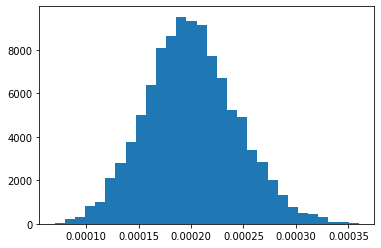

In [6]:
count, bins, ignored = plt.hist(r, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=2, color='r')
plt.show()

In [155]:
count

array([1.17418465e-04, 2.34836929e-05, 1.40902158e-04, 1.17418465e-04,
       3.05288008e-04, 3.05288008e-04, 7.98445560e-04, 6.34059709e-04,
       7.74961867e-04, 1.08024988e-03, 1.31508680e-03, 1.50295635e-03,
       1.94914651e-03, 2.18398344e-03, 1.85521174e-03, 2.13701606e-03,
       1.99611390e-03, 1.29160311e-03, 1.26811942e-03, 1.15070095e-03,
       8.21929253e-04, 7.04510788e-04, 3.52255394e-04, 1.64385851e-04,
       1.87869544e-04, 1.64385851e-04, 9.39347718e-05, 2.34836929e-05,
       0.00000000e+00, 2.34836929e-05])

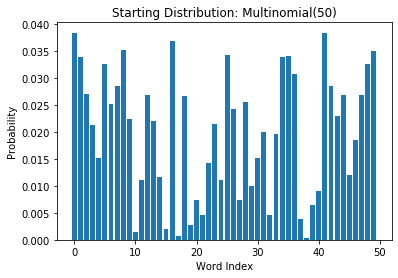

[0.03896465338599711, 0.03486971925531865, 0.027471316971275993, 0.021702117533124895, 0.015514232386870646, 0.033562437665652416, 0.025429051929615046, 0.028936956088168233, 0.0345170582108691, 0.022702358425845504, 0.001468506013043172, 0.01138313102206763, 0.02656818002545044, 0.02114107334270128, 0.010966292362236667, 0.0020193073388933653, 0.03711256089087889, 0.0007108151209952738, 0.027005677734162195, 0.0028484179615702694, 0.007332067095240164, 0.004868903108308974, 0.014610861220686682, 0.021360885103897314, 0.010953861121969931, 0.0336569171732481, 0.024171704492210174, 0.007231031186157709, 0.024908550671712906, 0.010286733573339722, 0.01540174563363914, 0.019040812411603544, 0.004749741182048798, 0.019478409257773947, 0.0343091920573019, 0.034326175270306625, 0.029639483035027166, 0.004092367700449533, 0.00026159651653302946, 0.006461688798020847, 0.008464229113505266, 0.0382628856419703, 0.02765699510213928, 0.023108627978367748, 0.027865168149367785, 0.011724717989143586

In [43]:
count = count * 100
import random
p = [1/words*random.random() for _ in range(words)]
r = np.random.multinomial(experiments, [x / sum(p) for x in p], size=1).squeeze() / experiments
plt.bar(range(len(r)), r)
plt.title("Starting Distribution: Multinomial(50)")
plt.xlabel("Word Index")
plt.ylabel("Probability")

plt.savefig("Multinomial.pdf")
plt.show()
print([x / sum(p) for x in p])

In [160]:
r = count

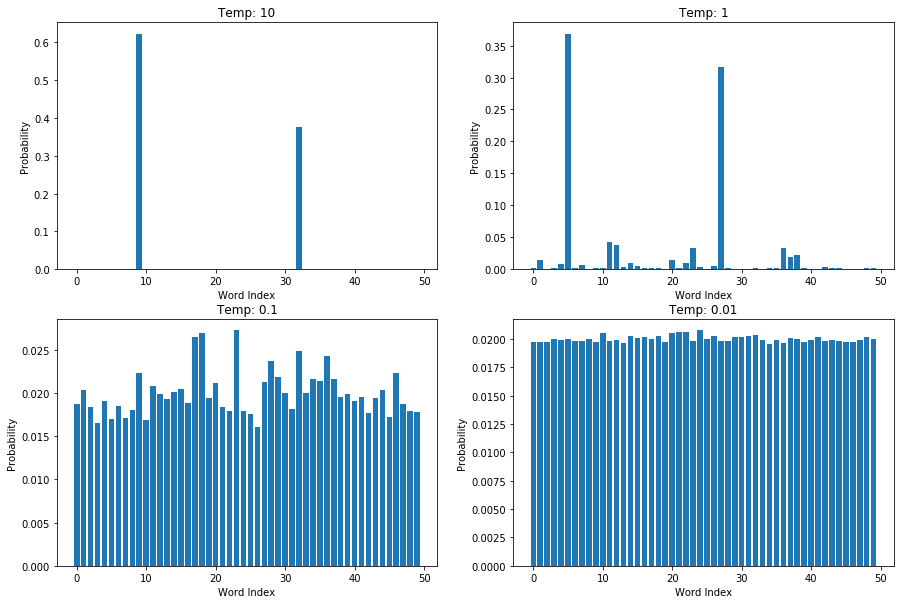

In [42]:
plt.figure(figsize=(15, 10))

temp = 10
plt.subplot(221)
plt.bar(range(len(r)),do_gumble(r, temp))
plt.xlabel("Word Index")
plt.ylabel("Probability")
plt.title("Temp: {}".format(temp))

temp = 1
plt.subplot(222)
plt.bar(range(len(r)),do_gumble(r, temp))
plt.xlabel("Word Index")
plt.ylabel("Probability")
plt.title("Temp: {}".format(temp))

temp = 0.1
plt.subplot(223)
plt.bar(range(len(r)),do_gumble(r, temp))
plt.xlabel("Word Index")
plt.ylabel("Probability")
plt.title("Temp: {}".format(temp))

temp = 0.01
plt.subplot(224)
plt.bar(range(len(r)),do_gumble(r, temp))
plt.xlabel("Word Index")
plt.ylabel("Probability")
plt.title("Temp: {}".format(temp))
plt.savefig("Multitemp.pdf")
plt.show()

In [99]:
r = r * 100

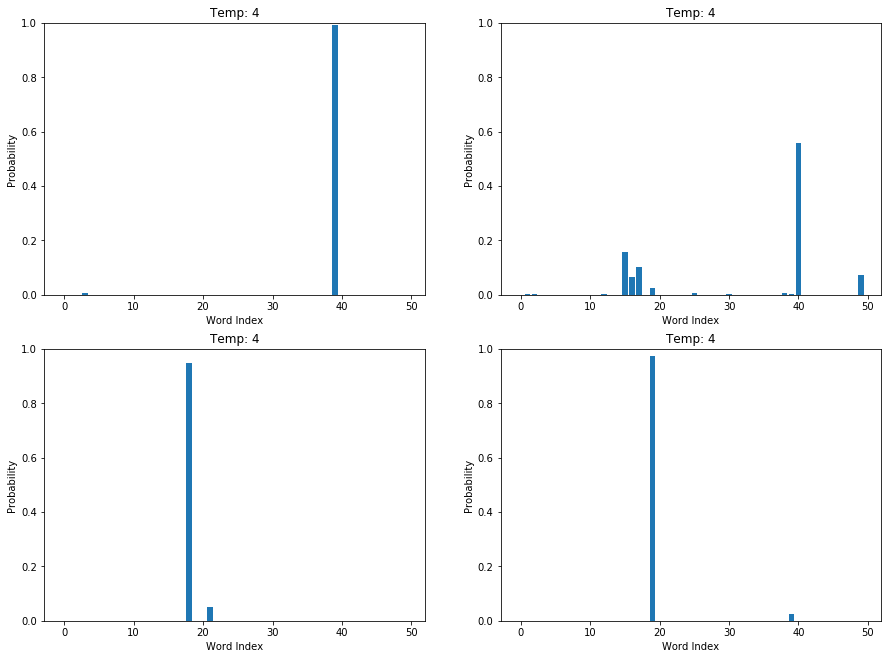

In [40]:
plt.figure(figsize=(15, 11))

temp = 4
plt.subplot(221)
plt.bar(range(len(r)),do_gumble(r, temp))
plt.xlabel("Word Index")
plt.ylabel("Probability")
plt.ylim(0, 1.0)
plt.title("Temp: {}".format(temp))

plt.subplot(222)
plt.bar(range(len(r)),do_gumble(r, temp))
plt.xlabel("Word Index")
plt.ylabel("Probability")
plt.ylim(0, 1.0)
plt.title("Temp: {}".format(temp))

plt.subplot(223)
plt.bar(range(len(r)),do_gumble(r, temp))
plt.xlabel("Word Index")
plt.ylabel("Probability")
plt.ylim(0, 1.0)
plt.title("Temp: {}".format(temp))

plt.subplot(224)
plt.bar(range(len(r)),do_gumble(r, temp))
plt.xlabel("Word Index")
plt.ylabel("Probability")
plt.ylim(0, 1.0)
plt.title("Temp: {}".format(temp))
plt.savefig("SameTemp.pdf")
plt.show()

In [98]:
np.argsort(-do_gumble(r*100,1))

array([2583, 3767, 3518, ..., 3970, 3672, 4560], dtype=int64)

In [123]:
np.argsort(-do_gumble(r,10))

array([2175, 3129, 3978, ..., 3118, 4214, 4013], dtype=int64)

In [7]:
def noise(o_t):
    eps = 1e-10
    u = np.random.uniform(size=o_t.shape)
    g_t = -np.log(-np.log(u + eps) + eps)
    return g_t

experiments = 100000
words = 5000
r = np.random.multinomial(experiments, [1/words]*words, size=1).squeeze() / experiments

ValueError: `bins` must increase monotonically, when an array

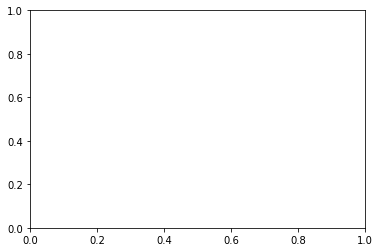

In [11]:
plt.hist(range(len(r)),noise(r))
plt.title("Temp: {}".format("a"))
plt.show()

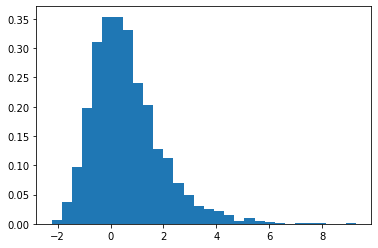

In [14]:
count, bins, ignored = plt.hist(noise(r), 30, density=True)

C:\Users\feder\Anaconda3\envs\RelGAN\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


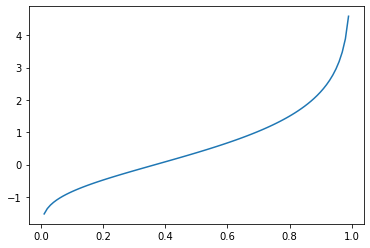

In [20]:
x = np.linspace(0,1,100)
plt.plot(x, -np.log(-np.log(x)))
plt.savefig("gumble_noise.png")